# Importing Required Libraries

In [22]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Preprocessing and Augmentation

In [23]:
# Create an ImageDataGenerator object for training with the following augmentations:
# - Rescale pixel values to range [0,1] by dividing by 255
# - Apply random zoom within a 20% range
# - Apply random shear transformations
# - Randomly flip images horizontally to increase data variability
train_gen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values
    zoom_range=0.2,         # Apply random zoom
    shear_range=0.2,        # Apply random shear
    horizontal_flip=True    # Random horizontal flip
)

# Load and preprocess training images from the 'train' directory using the generator:
# - Images are resized to 64x64 pixels
# - Batch size is set to 32 images per batch
# - Binary classification mode since there are two classes (e.g., tumor and no tumor)
train_val = train_gen.flow_from_directory(
    'train',                  # Path to the training data directory
    batch_size=32,            # Number of images per batch
    target_size=(64, 64),     # Resize all images to 64x64 pixels
    class_mode='binary'       # Use binary labels (0 or 1)
)


Found 320 images belonging to 2 classes.


# Preparing Test Dataset

In [24]:
# Create an ImageDataGenerator for test/validation data
# Only rescaling is applied (no augmentation for test data)
test_gen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values to range [0, 1]

# Load and preprocess test images from the 'test' directory using the generator:
# - Resize images to 64x64 pixels
# - Use a batch size of 32
# - Binary class mode since it's a binary classification problem
test_val = test_gen.flow_from_directory(
    'test',                 # Path to the test data directory
    batch_size=32,          # Number of images per batch
    target_size=(64, 64),   # Resize all images to 64x64 pixels
    class_mode='binary'     # Use binary labels (0 or 1)
)

Found 80 images belonging to 2 classes.


# Initializing the CNN Model

In [25]:
# Initialize a Sequential model for building the CNN layer by layer
cnn=tf.keras.models.Sequential()

# Adding the First Convolutional Layer

In [26]:
# Add the first convolutional layer to the CNN model
cnn.add(tf.keras.layers.Conv2D(
    filters=32,             # Number of filters (feature detectors) to apply
    kernel_size=3,          # Size of each filter (3x3)
    activation='relu',      # Apply ReLU activation to introduce non-linearity
    input_shape=(64,64,3)   # Input image shape: 64x64 pixels with 3 color channels (RGB)
))

/opt/anaconda3/envs/tf_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Adding Max Pooling Layer

In [27]:
# Add a Max Pooling layer to reduce spatial dimensions (downsampling)
cnn.add(tf.keras.layers.MaxPool2D(
    pool_size=2,  # Size of the pooling window (2x2)
    strides=2     # Step size for the pooling operation (moves 2 pixels at a time)
))

# Adding Second Convolutional Layer

In [28]:
# Add a second convolutional layer to extract more complex features
cnn.add(tf.keras.layers.Conv2D(
    filters=32,        # Number of filters (same as first conv layer)
    kernel_size=3,     # Size of each filter is 3x3
    activation='relu'  # ReLU activation to add non-linearity
    # No need to specify input_shape here since it's not the first layer
))

# Adding Second Max Pooling Layer

In [29]:
# Add a second Max Pooling layer to further reduce the spatial size of the feature maps
cnn.add(tf.keras.layers.MaxPool2D(
    pool_size=2,  # Pooling window size (2x2)
    strides=2     # Stride of 2 pixels to move the window
))

# Flattening the Layers

In [30]:
# Flatten the 2D feature maps into a 1D feature vector
cnn.add(tf.keras.layers.Flatten())

# Adding Fully Connected Layer

In [31]:
# Add a fully connected (dense) layer with 132 neurons and ReLU activation
cnn.add(tf.keras.layers.Dense(
    132,              # Number of neurons in the dense layer
    activation='relu' # ReLU activation for non-linearity
))

# Adding Output Layer

In [32]:
# Add the output layer with 1 neuron for binary classification
cnn.add(tf.keras.layers.Dense(
    1,                # Single neuron for binary output (0 or 1)
    activation='sigmoid'  # Sigmoid activation squashes output to range [0,1], giving probability
))

# Compiling the CNN Model

In [33]:
# Compile the CNN model by specifying the optimizer, loss function, and evaluation metric
cnn.compile(
    optimizer='adam',                  # Adam optimizer for efficient training
    loss='binary_crossentropy',        # Loss function suitable for binary classification
    metrics=['accuracy']               # Track accuracy during training and evaluation
)

# Training the CNN Model

In [34]:
# Train the CNN model on the training data and validate it on test data
history=cnn.fit(
    x=train_val,                 # Training data generator
    validation_data=test_val,    # Validation (test) data generator
    batch_size=32,               # Number of samples per gradient update
    epochs=75                    # Number of training cycles through the entire dataset
)

Epoch 1/75


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.5379 - loss: 0.9666 - val_accuracy: 0.4250 - val_loss: 0.7358
Epoch 2/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4933 - loss: 0.6952 - val_accuracy: 0.5750 - val_loss: 0.6873
Epoch 3/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6012 - loss: 0.6902 - val_accuracy: 0.5750 - val_loss: 0.7090
Epoch 4/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5528 - loss: 0.7049 - val_accuracy: 0.5625 - val_loss: 0.6775
Epoch 5/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6014 - loss: 0.6784 - val_accuracy: 0.5625 - val_loss: 0.6752
Epoch 6/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5450 - loss: 0.6811 - val_accuracy: 0.5625 - val_loss: 0.6728
Epoch 7/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5856 - loss: 0.6789 - val_accuracy: 0.6000 - val_loss: 0.6624
Epoch 8/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5916 - loss: 0.6633 - val_accuracy: 0.5875 - val_loss: 0.

# Viewing Class Indices

In [35]:
# View the mapping of class names to numeric labels used by the data generator
train_val.class_indices

{'Normal': 0, 'Tumor': 1}

# Preprocessing a New Image for Prediction

In [36]:
# Import necessary libraries
import numpy as np 
from tensorflow.keras.preprocessing import image

# Prompt the user to enter the path to the image they want to classify
file_path = input("Enter the file path : ")

# Load the image and resize it to 64x64 pixels (same as model's input size)
val = image.load_img(file_path, target_size=(64, 64))

# Convert the loaded image into a numpy array (so it can be processed by the model)
val = image.img_to_array(val)

# Expand dimensions to match the model's expected input shape: (1, 64, 64, 3)
val = np.expand_dims(val, axis=0)

# Making Prediction on New Image

In [37]:
# Use the trained CNN model to predict the class of the input image
result = cnn.predict(val)

# Check the predicted probability and classify accordingly
if result[0][0] == 1:
    print("It is a brain Tumor")
else:
    print("It is not a brain Tumor")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
It is a brain Tumor


# Evaluating the Model on Test Data

In [38]:
# Evaluate the model on the test dataset and get the loss and accuracy
loss, accuracy = cnn.evaluate(test_val)

# Print the accuracy of the trained model
print("Accuracy of model :", accuracy*100)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8867 - loss: 0.3874
Accuracy of model : 87.5


# Plotting Training and Validation Accuracy

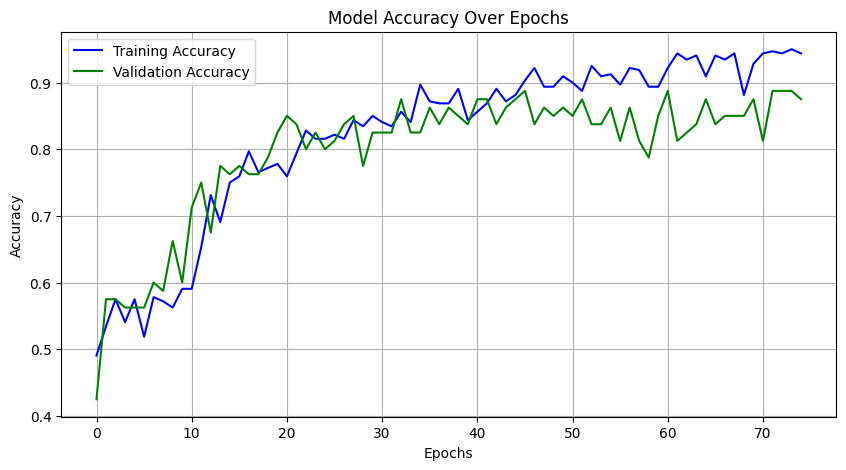

In [40]:
# Import matplotlib for plotting graphs
import matplotlib.pyplot as plt

# Create a new figure with a specified size
plt.figure(figsize=(10, 5))

# Plot training accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')

# Plot validation accuracy over epochs
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')

# Set the title and axis labels
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Add a legend to distinguish between training and validation lines
plt.legend()

# Add a grid for better readability
plt.grid(True)

# Display the plot
plt.show()